<a href="https://colab.research.google.com/github/MegaHotCoder/m/blob/main/ML_firstKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [404]:
df = pd.read_csv('/content/gdrive/MyDrive/DataStore/train_dataset.csv')
testD = pd.read_csv('/content/gdrive/MyDrive/DataStore/test_dataset.csv')

# 코드 정렬

In [405]:
import re

def sort_columns_by_suffix(df):
    def split_col(col):
        match = re.match(r'(.*)_(\d+)$', col)
        if match:
            prefix, num = match.groups()
            return (prefix, int(num))
        else:
            return (col, -1)  # 정렬 안 되는 항목은 맨 앞에

    sorted_cols = sorted(df.columns, key=split_col)
    return df[sorted_cols]

df = sort_columns_by_suffix(df)
testD = sort_columns_by_suffix(testD)

In [406]:
print(df.columns.tolist())

['climatology_temp', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'date', 'dew_point_0', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'humidity_0', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5', 'humidity_6', 'humidity_7', 'humidity_8', 'humidity_9', 'humidity_10', 'humidity_11', 'humi

# **날짜**

In [407]:
nan_count = df['date'].isna().sum()
print(nan_count)

0


In [408]:
# date 손보기
df[['month', 'day']] = df['date'].str.split('-', expand=True)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

testD[['month', 'day']] = testD['date'].str.split('-', expand=True)
testD['month'] = testD['month'].astype(int)
testD['day'] = testD['day'].astype(int)

In [409]:
df = df.drop('date', axis=1)

In [410]:
testD = testD.drop('date', axis = 1)

In [411]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)  # 월별 주기
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 2. day를 주기적 특성으로 변환
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  # 31일 주기
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

# 3. 기존의 month와 day 컬럼은 drop

# 1. month를 주기적 특성으로 변환
testD['month_sin'] = np.sin(2 * np.pi * testD['month'] / 12)  # 월별 주기
testD['month_cos'] = np.cos(2 * np.pi * testD['month'] / 12)

# 2. day를 주기적 특성으로 변환
testD['day_sin'] = np.sin(2 * np.pi * testD['day'] / 31)  # 31일 주기
testD['day_cos'] = np.cos(2 * np.pi * testD['day'] / 31)

# station

In [412]:
df[(df['station'] == 98) & (df['month'] == 1) & (df['day'] == 1)]

,climatology_temp,cloud_cover_0,cloud_cover_1,cloud_cover_2,cloud_cover_3,cloud_cover_4,cloud_cover_5,cloud_cover_6,cloud_cover_7,cloud_cover_8,...,wind_speed_20,wind_speed_21,wind_speed_22,wind_speed_23,month,day,month_sin,month_cos,day_sin,day_cos
0,-2.707143,0.0,0.0,0.0,0.0,2.0,2.0,8.0,3.0,8.0,...,4.1,2.5,2.9,2.3,1,1,0.5,0.866025,0.201299,0.97953
365,-2.707143,9.0,8.0,9.0,9.0,9.0,8.0,8.0,9.0,9.0,...,1.0,0.2,0.9,0.6,1,1,0.5,0.866025,0.201299,0.97953
731,-2.707143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.3,0.7,2.4,1,1,0.5,0.866025,0.201299,0.97953
1096,-2.707143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.2,1.0,1.3,1,1,0.5,0.866025,0.201299,0.97953
1460,-2.707143,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.2,1.6,2.3,0.4,1,1,0.5,0.866025,0.201299,0.97953
1824,-2.707143,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,4.0,...,0.1,0.1,0.4,0.8,1,1,0.5,0.866025,0.201299,0.97953


In [413]:
#station 전부 삭제

df = df.drop('station', axis=1)

In [414]:
testD = testD.drop('station', axis = 1)

# cloud cover 불측값 제거

In [415]:
#cloud_cover불측값 관측

for i in range(24):
    col = f"cloud_cover_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

cloud_cover_0: NaN = 187, -9999 = 0
cloud_cover_1: NaN = 212, -9999 = 0
cloud_cover_2: NaN = 196, -9999 = 0
cloud_cover_3: NaN = 192, -9999 = 0
cloud_cover_4: NaN = 200, -9999 = 0
cloud_cover_5: NaN = 206, -9999 = 0
cloud_cover_6: NaN = 209, -9999 = 0
cloud_cover_7: NaN = 226, -9999 = 0
cloud_cover_8: NaN = 230, -9999 = 0
cloud_cover_9: NaN = 211, -9999 = 0
cloud_cover_10: NaN = 216, -9999 = 0
cloud_cover_11: NaN = 206, -9999 = 0
cloud_cover_12: NaN = 201, -9999 = 0
cloud_cover_13: NaN = 206, -9999 = 0
cloud_cover_14: NaN = 213, -9999 = 0
cloud_cover_15: NaN = 194, -9999 = 0
cloud_cover_16: NaN = 208, -9999 = 0
cloud_cover_17: NaN = 199, -9999 = 0
cloud_cover_18: NaN = 196, -9999 = 0
cloud_cover_19: NaN = 195, -9999 = 0
cloud_cover_20: NaN = 197, -9999 = 0
cloud_cover_21: NaN = 190, -9999 = 0
cloud_cover_22: NaN = 185, -9999 = 0
cloud_cover_23: NaN = 189, -9999 = 0


In [416]:
import numpy as np
from tqdm import tqdm
import lightgbm as lgb

def interpolate_cloud_cover(dataframe):
    cloud_cols = [f'cloud_cover_{i}' for i in range(24)]

    # 각 컬럼에 대해 처리
    for col in tqdm(cloud_cols):
        # lag 및 rolling feature 생성
        dataframe[f'{col}_lag1'] = dataframe[col].shift(1)
        dataframe[f'{col}_lag2'] = dataframe[col].shift(2)
        dataframe[f'{col}_roll3'] = dataframe[col].rolling(window=3, min_periods=1).mean()

        features = [
            'month_sin', 'month_cos', 'day_sin', 'day_cos',
            f'{col}_lag1', f'{col}_lag2', f'{col}_roll3',
            # 'month', 'day' 삭제 - 이미 주기적 특성으로 대체됨
        ]

        # train 데이터와 test 데이터 나누기
        train_data = dataframe[dataframe[col].notna()]
        test_data = dataframe[dataframe[col].isna()]

        # ⛔ 에러 방지: feature가 비어 있으면 스킵
        if train_data[features].empty or test_data[features].empty:
            print(f"⚠️  Skip {col} - empty input")
            continue

        X_train = train_data[features].fillna(-1)
        y_train = train_data[col]
        X_pred = test_data[features].fillna(-1)

        model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        dataframe.loc[dataframe[col].isna(), col] = model.predict(X_pred)

    return dataframe

# df와 testD 모두 처리
df = interpolate_cloud_cover(df)
testD = interpolate_cloud_cover(testD)

  0%|          | 0/24 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 12945, number of used features: 7
[LightGBM] [Info] Start training from score 2.915798


  8%|▊         | 2/24 [00:00<00:04,  5.07it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 12920, number of used features: 7
[LightGBM] [Info] Start training from score 3.022291
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 12936, number of used features: 7
[LightGBM] [Info] Start training from score 3.076531


 17%|█▋        | 4/24 [00:00<00:03,  5.01it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 12940, number of used features: 7
[LightGBM] [Info] Start training from score 3.171329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 12932, number of used features: 7
[LightGBM] [Info] Start training from score 3.284024


 25%|██▌       | 6/24 [00:01<00:03,  4.94it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 12926, number of used features: 7
[LightGBM] [Info] Start training from score 3.322683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 12923, number of used features: 7
[LightGBM] [Info] Start training from score 3.341252


 33%|███▎      | 8/24 [00:01<00:03,  4.93it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 12906, number of used features: 7
[LightGBM] [Info] Start training from score 3.241206


 38%|███▊      | 9/24 [00:01<00:03,  4.92it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 12902, number of used features: 7
[LightGBM] [Info] Start training from score 3.194543
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 12921, number of used features: 7
[LightGBM] [Info] Start training from score 3.207337


 46%|████▌     | 11/24 [00:02<00:02,  4.80it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 12916, number of used features: 7
[LightGBM] [Info] Start training from score 3.126742


 50%|█████     | 12/24 [00:02<00:02,  4.87it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 12926, number of used features: 7
[LightGBM] [Info] Start training from score 3.092063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 12931, number of used features: 7
[LightGBM] [Info] Start training from score 3.046400


 58%|█████▊    | 14/24 [00:02<00:01,  5.81it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 12926, number of used features: 7
[LightGBM] [Info] Start training from score 3.035046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 12919, number of used features: 7
[LightGBM] [Info] Start training from score 2.992182


 67%|██████▋   | 16/24 [00:03<00:01,  6.32it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 12938, number of used features: 7
[LightGBM] [Info] Start training from score 2.911115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 12924, number of used features: 7
[LightGBM] [Info] Start training from score 2.839059


 75%|███████▌  | 18/24 [00:03<00:00,  6.76it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 12933, number of used features: 7
[LightGBM] [Info] Start training from score 2.726746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 12936, number of used features: 7
[LightGBM] [Info] Start training from score 2.617811


 83%|████████▎ | 20/24 [00:03<00:00,  6.92it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 12937, number of used features: 7
[LightGBM] [Info] Start training from score 2.651697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 12935, number of used features: 7
[LightGBM] [Info] Start training from score 2.765906


 92%|█████████▏| 22/24 [00:03<00:00,  6.92it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 12942, number of used features: 7
[LightGBM] [Info] Start training from score 2.744244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 12947, number of used features: 7
[LightGBM] [Info] Start training from score 2.816946


100%|██████████| 24/24 [00:04<00:00,  5.75it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 12943, number of used features: 7
[LightGBM] [Info] Start training from score 2.860542


  0%|          | 0/24 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 7
[LightGBM] [Info] Start training from score 2.810730
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 7
[LightGBM] [Info] Start training from score 2.873291


  8%|▊         | 2/24 [00:00<00:01, 17.34it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 7
[LightGBM] [Info] Start training from score 2.953349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 7
[LightGBM] [Info] Start training from score 3.060646


 17%|█▋        | 4/24 [00:00<00:01, 17.32it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 7
[LightGBM] [Info] Start training from score 3.176608
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 7
[LightGBM] [Info] Start training from score 3.244000


 25%|██▌       | 6/24 [00:00<00:01, 17.06it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 7
[LightGBM] [Info] Start training from score 3.218261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 7
[LightGBM] [Info] Start training from score 3.118000


 33%|███▎      | 8/24 [00:00<00:00, 16.92it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 7
[LightGBM] [Info] Start training from score 3.149050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 7
[LightGBM] [Info] Start training from score 3.095365


 42%|████▏     | 10/24 [00:00<00:00, 16.99it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 2996, number of used features: 7
[LightGBM] [Info] Start training from score 3.011348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 2994, number of used features: 7
[LightGBM] [Info] Start training from score 2.921510


 50%|█████     | 12/24 [00:00<00:00, 16.93it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 2993, number of used features: 7
[LightGBM] [Info] Start training from score 2.894754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 2995, number of used features: 7
[LightGBM] [Info] Start training from score 2.823372


 58%|█████▊    | 14/24 [00:00<00:00, 16.59it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 2996, number of used features: 7
[LightGBM] [Info] Start training from score 2.872163


 67%|██████▋   | 16/24 [00:00<00:00, 15.85it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 7
[LightGBM] [Info] Start training from score 2.752584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 7
[LightGBM] [Info] Start training from score 2.557186


 75%|███████▌  | 18/24 [00:01<00:00, 15.59it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 7
[LightGBM] [Info] Start training from score 2.424950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 7
[LightGBM] [Info] Start training from score 2.207138


 83%|████████▎ | 20/24 [00:01<00:00, 15.88it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 7
[LightGBM] [Info] Start training from score 2.273849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 2996, number of used features: 7
[LightGBM] [Info] Start training from score 2.325100


 92%|█████████▏| 22/24 [00:01<00:00, 16.27it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 7
[LightGBM] [Info] Start training from score 2.286571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 7
[LightGBM] [Info] Start training from score 2.396931


100%|██████████| 24/24 [00:01<00:00, 16.41it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 7
[LightGBM] [Info] Start training from score 2.427809


In [417]:
for i in range(24):
    col = f"cloud_cover_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

cloud_cover_0: NaN = 0, -9999 = 0
cloud_cover_1: NaN = 0, -9999 = 0
cloud_cover_2: NaN = 0, -9999 = 0
cloud_cover_3: NaN = 0, -9999 = 0
cloud_cover_4: NaN = 0, -9999 = 0
cloud_cover_5: NaN = 0, -9999 = 0
cloud_cover_6: NaN = 0, -9999 = 0
cloud_cover_7: NaN = 0, -9999 = 0
cloud_cover_8: NaN = 0, -9999 = 0
cloud_cover_9: NaN = 0, -9999 = 0
cloud_cover_10: NaN = 0, -9999 = 0
cloud_cover_11: NaN = 0, -9999 = 0
cloud_cover_12: NaN = 0, -9999 = 0
cloud_cover_13: NaN = 0, -9999 = 0
cloud_cover_14: NaN = 0, -9999 = 0
cloud_cover_15: NaN = 0, -9999 = 0
cloud_cover_16: NaN = 0, -9999 = 0
cloud_cover_17: NaN = 0, -9999 = 0
cloud_cover_18: NaN = 0, -9999 = 0
cloud_cover_19: NaN = 0, -9999 = 0
cloud_cover_20: NaN = 0, -9999 = 0
cloud_cover_21: NaN = 0, -9999 = 0
cloud_cover_22: NaN = 0, -9999 = 0
cloud_cover_23: NaN = 0, -9999 = 0


# min cloud height

In [418]:
for i in range(24):
    col = f"min_cloud_height_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

min_cloud_height_0: NaN = 11184, -9999 = 0
min_cloud_height_1: NaN = 7184, -9999 = 0
min_cloud_height_2: NaN = 7126, -9999 = 0
min_cloud_height_3: NaN = 7098, -9999 = 0
min_cloud_height_4: NaN = 7030, -9999 = 0
min_cloud_height_5: NaN = 7059, -9999 = 0
min_cloud_height_6: NaN = 7048, -9999 = 0
min_cloud_height_7: NaN = 7076, -9999 = 0
min_cloud_height_8: NaN = 7114, -9999 = 0
min_cloud_height_9: NaN = 6851, -9999 = 0
min_cloud_height_10: NaN = 6678, -9999 = 0
min_cloud_height_11: NaN = 6324, -9999 = 0
min_cloud_height_12: NaN = 6016, -9999 = 0
min_cloud_height_13: NaN = 5862, -9999 = 0
min_cloud_height_14: NaN = 5866, -9999 = 0
min_cloud_height_15: NaN = 6042, -9999 = 0
min_cloud_height_16: NaN = 6247, -9999 = 0
min_cloud_height_17: NaN = 6546, -9999 = 0
min_cloud_height_18: NaN = 6886, -9999 = 0
min_cloud_height_19: NaN = 7241, -9999 = 0
min_cloud_height_20: NaN = 7187, -9999 = 0
min_cloud_height_21: NaN = 7320, -9999 = 0
min_cloud_height_22: NaN = 7300, -9999 = 0
min_cloud_height_23:

In [419]:
for i in range(24):
    col = f"min_cloud_height_{i}"
    temp = df[[col, 'target']].dropna()
    if not temp.empty:
        corr = temp[col].corr(temp['target'])
        print(f"{col}: corr={corr:.3f}")

min_cloud_height_0: corr=0.028
min_cloud_height_1: corr=0.007
min_cloud_height_2: corr=0.018
min_cloud_height_3: corr=0.011
min_cloud_height_4: corr=0.002
min_cloud_height_5: corr=-0.007
min_cloud_height_6: corr=0.010
min_cloud_height_7: corr=0.006
min_cloud_height_8: corr=0.017
min_cloud_height_9: corr=0.019
min_cloud_height_10: corr=0.004
min_cloud_height_11: corr=0.000
min_cloud_height_12: corr=0.021
min_cloud_height_13: corr=0.020
min_cloud_height_14: corr=0.031
min_cloud_height_15: corr=0.019
min_cloud_height_16: corr=0.041
min_cloud_height_17: corr=0.035
min_cloud_height_18: corr=0.037
min_cloud_height_19: corr=0.101
min_cloud_height_20: corr=0.093
min_cloud_height_21: corr=0.029
min_cloud_height_22: corr=0.048
min_cloud_height_23: corr=0.028


**min cloud 삭제**

In [420]:
#삭제
cols_to_drop = [f"min_cloud_height_{i}" for i in range(24)]
df = df.drop(columns=cols_to_drop)

In [421]:
testD = testD.drop(columns= cols_to_drop)

**wind direction one-hot encoding**

In [422]:
def convert_wind_direction_to_sin_cos(df):
    for i in range(24):
        col = f'wind_direction_{i}'
        sin_col = f'wind_sin_{i}'
        cos_col = f'wind_cos_{i}'

        df[sin_col] = np.sin(np.deg2rad(df[col]))
        df[cos_col] = np.cos(np.deg2rad(df[col]))

    return df

df = convert_wind_direction_to_sin_cos(df)
testD =  convert_wind_direction_to_sin_cos(testD)

<ipython-input-422-c7eedd58e377>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cos_col] = np.cos(np.deg2rad(df[col]))
<ipython-input-422-c7eedd58e377>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[sin_col] = np.sin(np.deg2rad(df[col]))
<ipython-input-422-c7eedd58e377>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

In [423]:
def interpolate_wind_sin_cos(df):
    sin_cols = [f'wind_sin_{i}' for i in range(24)]
    cos_cols = [f'wind_cos_{i}' for i in range(24)]

    for idx in df.index:
        for i in range(24):
            sin_col = f'wind_sin_{i}'
            cos_col = f'wind_cos_{i}'

            if pd.isna(df.loc[idx, sin_col]):
                neighbors = []
                if i > 0 and pd.notna(df.loc[idx, f'wind_sin_{i-1}']):
                    neighbors.append(df.loc[idx, f'wind_sin_{i-1}'])
                if i < 23 and pd.notna(df.loc[idx, f'wind_sin_{i+1}']):
                    neighbors.append(df.loc[idx, f'wind_sin_{i+1}'])
                if neighbors:
                    df.loc[idx, sin_col] = np.mean(neighbors)

            if pd.isna(df.loc[idx, cos_col]):
                neighbors = []
                if i > 0 and pd.notna(df.loc[idx, f'wind_cos_{i-1}']):
                    neighbors.append(df.loc[idx, f'wind_cos_{i-1}'])
                if i < 23 and pd.notna(df.loc[idx, f'wind_cos_{i+1}']):
                    neighbors.append(df.loc[idx, f'wind_cos_{i+1}'])
                if neighbors:
                    df.loc[idx, cos_col] = np.mean(neighbors)

    return df


In [424]:
df = interpolate_wind_sin_cos(df)
testD= interpolate_wind_sin_cos(testD)

In [425]:
def fill_remaining_wind_sin_cos_by_day(df):
    for i in range(24):
        sin_col = f'wind_sin_{i}'
        cos_col = f'wind_cos_{i}'

        for idx in df.index:
            # 보간 대상: sin
            if pd.isna(df.loc[idx, sin_col]):
                month = df.loc[idx, 'month']
                day = df.loc[idx, 'day']
                mask = (
                    (df['month'] == month) &
                    (df['day'] == day) &
                    (~df[sin_col].isna())
                )
                values = df.loc[mask, sin_col]
                if not values.empty:
                    df.loc[idx, sin_col] = values.mean()

            # 보간 대상: cos
            if pd.isna(df.loc[idx, cos_col]):
                month = df.loc[idx, 'month']
                day = df.loc[idx, 'day']
                mask = (
                    (df['month'] == month) &
                    (df['day'] == day) &
                    (~df[cos_col].isna())
                )
                values = df.loc[mask, cos_col]
                if not values.empty:
                    df.loc[idx, cos_col] = values.mean()
    return df

In [426]:
df = fill_remaining_wind_sin_cos_by_day(df)

In [427]:
for i in range(24):
    missing_indices = df[df[f'wind_sin_{i}'].isna()].index
    if not missing_indices.empty:
        print(f"결측치가 있는 열: wind_direction_{i}")
        print("인덱스:", missing_indices.tolist())

In [428]:
# wind_direction_cols = [f"wind_direction_{i}" for i in range(24)]

# # -9999 → NaN 처리
# for col in wind_direction_cols:
#     df[col] = np.where(df[col] == -9999, np.nan, df[col])

# # 24시간 평균 풍향
# df['wind_direction_mean'] = df[wind_direction_cols].mean(axis=1)

# # 풍향 → 7계절 구간 정수 매핑 함수
# def map_direction_to_season_code(degree):
#     if pd.isna(degree):
#         return np.nan
#     degree = degree % 360  # 0~360으로 정규화
#     if (degree >= 330 or degree < 30):
#         return 0  # 겨울-봄 사이
#     elif degree < 75:
#         return 1  # 봄
#     elif degree < 120:
#         return 2  # 봄-여름 사이
#     elif degree < 165:
#         return 3  # 여름
#     elif degree < 210:
#         return 4  # 여름-가을 사이
#     elif degree < 255:
#         return 5  # 가을
#     else:
#         return 6  # 가을-겨울 사이

# # 적용
# df['season_from_wind'] = df['wind_direction_mean'].apply(map_direction_to_season_code).astype("Int64")
# testD['season_from_wind'] = testD['wind_direction_mean'].apply(map_direction_to_season_code).astype("Int64")

In [429]:
# missing_mask = df['season_from_wind'].isna()

# # 2. 월별 중앙값 계산
# month_median = df.groupby('month')['season_from_wind'].median()

# # 3. 결측값 대체 함수 정의
# def fill_with_month_median(row):
#     if pd.isna(row['season_from_wind']):
#         return month_median.get(row['month'], np.nan)
#     else:
#         return row['season_from_wind']

# # 4. 적용
# df['season_from_wind'] = df.apply(fill_with_month_median, axis=1).astype('Int64')

In [430]:
# testD['season_from_wind'] = testD.apply(fill_with_month_median, axis=1).astype('Int64')

In [431]:
# from sklearn.preprocessing import OneHotEncoder


# df['is_train'] = 1
# testD['is_train'] = 0

# # 2. train + test 합치기
# combined = pd.concat([df, testD], axis=0)

# # 3. One-hot encoding (한 번만!)
# combined = pd.get_dummies(combined, columns=['season_from_wind'], prefix='season')

# # 4. 다시 train/test로 분리
# df = combined[combined['is_train'] == 1].drop(columns='is_train').reset_index(drop=True)
# testD = combined[combined['is_train'] == 0].drop(columns='is_train').reset_index(drop=True)



In [432]:
#station 위치 설정

# 관측소별 위도, 경도, 고도 매핑
location_map = {
    "서울":      (37.59142, 126.9658,   85.67),
    "동두천":    (37.90188, 127.0607,  115.62),
    "강화":      (37.70739, 126.44634,  47.84),
    "인천":      (37.47772, 126.6249,   68.99),
    "이천":      (37.26399, 127.48421,  80.09),
    "양평":      (37.48863, 127.49446,  47.26),
    "파주":      (37.88589, 126.76648,  30.59),
    "수원":      (37.25746, 126.983,    39.81)
}

df["위도"] = df["station_name"].map(lambda name: location_map[name][0])
df["경도"] = df["station_name"].map(lambda name: location_map[name][1])
df["고도"] = df["station_name"].map(lambda name: location_map[name][2])

<ipython-input-432-a4ab8d801ab2>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["위도"] = df["station_name"].map(lambda name: location_map[name][0])
<ipython-input-432-a4ab8d801ab2>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["경도"] = df["station_name"].map(lambda name: location_map[name][1])
<ipython-input-432-a4ab8d801ab2>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [433]:
testD["위도"] = testD["station_name"].map(lambda name: location_map[name][0])
testD["경도"] = testD["station_name"].map(lambda name: location_map[name][1])
testD["고도"] = testD["station_name"].map(lambda name: location_map[name][2])

<ipython-input-433-eef0266b718f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testD["위도"] = testD["station_name"].map(lambda name: location_map[name][0])
<ipython-input-433-eef0266b718f>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testD["경도"] = testD["station_name"].map(lambda name: location_map[name][1])
<ipython-input-433-eef0266b718f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

# sunshine_duration

In [434]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

sunshine_duration_0: NaN = 13132, -9999 = 0
sunshine_duration_1: NaN = 13132, -9999 = 0
sunshine_duration_2: NaN = 13132, -9999 = 0
sunshine_duration_3: NaN = 13132, -9999 = 0
sunshine_duration_4: NaN = 13132, -9999 = 0
sunshine_duration_5: NaN = 13132, -9999 = 0
sunshine_duration_6: NaN = 8203, -9999 = 0
sunshine_duration_7: NaN = 4347, -9999 = 0
sunshine_duration_8: NaN = 27, -9999 = 0
sunshine_duration_9: NaN = 24, -9999 = 0
sunshine_duration_10: NaN = 24, -9999 = 0
sunshine_duration_11: NaN = 30, -9999 = 0
sunshine_duration_12: NaN = 30, -9999 = 0
sunshine_duration_13: NaN = 26, -9999 = 0
sunshine_duration_14: NaN = 28, -9999 = 0
sunshine_duration_15: NaN = 27, -9999 = 0
sunshine_duration_16: NaN = 27, -9999 = 0
sunshine_duration_17: NaN = 30, -9999 = 0
sunshine_duration_18: NaN = 28, -9999 = 0
sunshine_duration_19: NaN = 4189, -9999 = 0
sunshine_duration_20: NaN = 7802, -9999 = 0
sunshine_duration_21: NaN = 13058, -9999 = 0
sunshine_duration_22: NaN = 13132, -9999 = 0
sunshine_dur

In [435]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].unique()
    print(f"{col}: 값 = {nan_count}")

sunshine_duration_0: 값 = [nan]
sunshine_duration_1: 값 = [nan]
sunshine_duration_2: 값 = [nan]
sunshine_duration_3: 값 = [nan]
sunshine_duration_4: 값 = [nan]
sunshine_duration_5: 값 = [nan]
sunshine_duration_6: 값 = [nan 0.  0.1 0.3 0.2 0.4]
sunshine_duration_7: 값 = [nan 0.  0.2 0.3 0.4 0.5 0.1 0.8 0.6 0.9 1.  0.7]
sunshine_duration_8: 값 = [0.  0.1 0.2 0.4 0.3 0.5 0.6 0.7 0.9 1.  0.8 nan]
sunshine_duration_9: 값 = [0.  0.5 0.4 0.3 0.2 0.7 0.6 0.1 0.8 0.9 1.  nan]
sunshine_duration_10: 값 = [0.6 1.  0.8 0.  0.4 0.1 0.9 0.7 0.5 0.3 0.2 nan]
sunshine_duration_11: 값 = [0.9 1.  0.8 0.  0.6 0.7 0.2 0.3 0.5 0.4 0.1 nan]
sunshine_duration_12: 값 = [1.  0.5 0.4 0.  0.7 0.2 0.9 0.8 0.1 0.6 0.3 nan]
sunshine_duration_13: 값 = [1.  0.  0.9 0.8 0.1 0.4 0.2 0.5 0.3 0.6 0.7 nan]
sunshine_duration_14: 값 = [1.  0.7 0.5 0.2 0.6 0.  0.8 0.9 0.4 0.1 0.3 nan]
sunshine_duration_15: 값 = [1.  0.2 0.9 0.4 0.  0.8 0.3 0.5 0.7 0.1 0.6 nan]
sunshine_duration_16: 값 = [1.  0.8 0.  0.3 0.7 0.9 0.6 0.1 0.2 0.4 0.5 nan]
sunshi

In [436]:
def process_sunshine_duration(dataframe):
    # 0. 컬럼 리스트 정의
    sun_cols = [f"sunshine_duration_{i}" for i in range(24)]

    # 1. -9999 → NaN으로 먼저 처리
    dataframe[sun_cols] = dataframe[sun_cols].replace(-9999, np.nan)

    # 2. 평균값 조건에 따른 결측값 채우기
    for col in sun_cols:
        mean_val = dataframe[col].mean(skipna=True)

        if mean_val <= 0.2:
            dataframe[col] = dataframe[col].fillna(0)
        elif mean_val >= 0.8:
            dataframe[col] = dataframe[col].fillna(1)
        else:
            dataframe[col] = dataframe[col].fillna(mean_val)

    # 3. 결측 상태 출력 (보간 후)
    for i in range(24):
        col = f"sunshine_duration_{i}"
        nan_count = dataframe[col].isna().sum()
        neg_9999_count = (dataframe[col] == -9999).sum()
        print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

    # 4. 남은 NaN 0으로 처리
    dataframe[sun_cols] = dataframe[sun_cols].fillna(0)

    # 5. 다시 확인
    for i in range(24):
        col = f"sunshine_duration_{i}"
        nan_count = dataframe[col].isna().sum()
        neg_9999_count = (dataframe[col] == -9999).sum()
        print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

    return dataframe

# df와 testD 모두 처리
df = process_sunshine_duration(df)
testD = process_sunshine_duration(testD)

sunshine_duration_0: NaN = 13132, -9999 = 0
sunshine_duration_1: NaN = 13132, -9999 = 0
sunshine_duration_2: NaN = 13132, -9999 = 0
sunshine_duration_3: NaN = 13132, -9999 = 0
sunshine_duration_4: NaN = 13132, -9999 = 0
sunshine_duration_5: NaN = 13132, -9999 = 0
sunshine_duration_6: NaN = 0, -9999 = 0
sunshine_duration_7: NaN = 0, -9999 = 0
sunshine_duration_8: NaN = 0, -9999 = 0
sunshine_duration_9: NaN = 0, -9999 = 0
sunshine_duration_10: NaN = 0, -9999 = 0
sunshine_duration_11: NaN = 0, -9999 = 0
sunshine_duration_12: NaN = 0, -9999 = 0
sunshine_duration_13: NaN = 0, -9999 = 0
sunshine_duration_14: NaN = 0, -9999 = 0
sunshine_duration_15: NaN = 0, -9999 = 0
sunshine_duration_16: NaN = 0, -9999 = 0
sunshine_duration_17: NaN = 0, -9999 = 0
sunshine_duration_18: NaN = 0, -9999 = 0
sunshine_duration_19: NaN = 0, -9999 = 0
sunshine_duration_20: NaN = 0, -9999 = 0
sunshine_duration_21: NaN = 0, -9999 = 0
sunshine_duration_22: NaN = 13132, -9999 = 0
sunshine_duration_23: NaN = 13132, -999

In [437]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

sunshine_duration_0: NaN = 0, -9999 = 0
sunshine_duration_1: NaN = 0, -9999 = 0
sunshine_duration_2: NaN = 0, -9999 = 0
sunshine_duration_3: NaN = 0, -9999 = 0
sunshine_duration_4: NaN = 0, -9999 = 0
sunshine_duration_5: NaN = 0, -9999 = 0
sunshine_duration_6: NaN = 0, -9999 = 0
sunshine_duration_7: NaN = 0, -9999 = 0
sunshine_duration_8: NaN = 0, -9999 = 0
sunshine_duration_9: NaN = 0, -9999 = 0
sunshine_duration_10: NaN = 0, -9999 = 0
sunshine_duration_11: NaN = 0, -9999 = 0
sunshine_duration_12: NaN = 0, -9999 = 0
sunshine_duration_13: NaN = 0, -9999 = 0
sunshine_duration_14: NaN = 0, -9999 = 0
sunshine_duration_15: NaN = 0, -9999 = 0
sunshine_duration_16: NaN = 0, -9999 = 0
sunshine_duration_17: NaN = 0, -9999 = 0
sunshine_duration_18: NaN = 0, -9999 = 0
sunshine_duration_19: NaN = 0, -9999 = 0
sunshine_duration_20: NaN = 0, -9999 = 0
sunshine_duration_21: NaN = 0, -9999 = 0
sunshine_duration_22: NaN = 0, -9999 = 0
sunshine_duration_23: NaN = 0, -9999 = 0


# **snow depth**

In [438]:
for i in range(24):
    col = f"snow_depth_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

snow_depth_0: NaN = 12678, -9999 = 0
snow_depth_1: NaN = 12672, -9999 = 0
snow_depth_2: NaN = 12667, -9999 = 0
snow_depth_3: NaN = 12656, -9999 = 0
snow_depth_4: NaN = 12644, -9999 = 0
snow_depth_5: NaN = 12642, -9999 = 0
snow_depth_6: NaN = 12625, -9999 = 0
snow_depth_7: NaN = 12620, -9999 = 0
snow_depth_8: NaN = 12612, -9999 = 0
snow_depth_9: NaN = 12603, -9999 = 0
snow_depth_10: NaN = 12600, -9999 = 0
snow_depth_11: NaN = 12610, -9999 = 0
snow_depth_12: NaN = 12634, -9999 = 0
snow_depth_13: NaN = 12686, -9999 = 0
snow_depth_14: NaN = 12720, -9999 = 0
snow_depth_15: NaN = 12740, -9999 = 0
snow_depth_16: NaN = 12748, -9999 = 0
snow_depth_17: NaN = 12744, -9999 = 0
snow_depth_18: NaN = 12732, -9999 = 0
snow_depth_19: NaN = 12724, -9999 = 0
snow_depth_20: NaN = 12718, -9999 = 0
snow_depth_21: NaN = 12700, -9999 = 0
snow_depth_22: NaN = 12701, -9999 = 0
snow_depth_23: NaN = 12692, -9999 = 0


<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-439-27bdf7c67b9f>:15: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<i

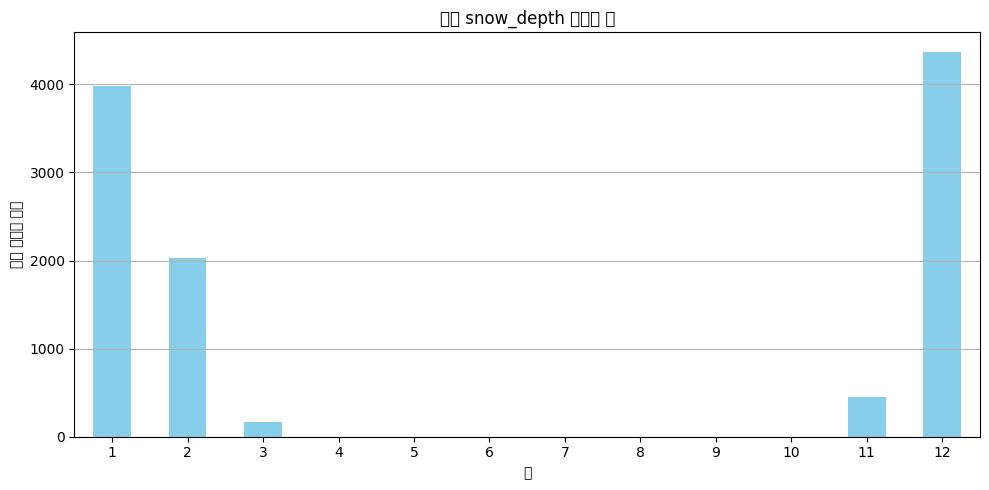

In [439]:
# snow_depth 컬럼들
snow_cols = [col for col in df.columns if 'snow_depth_' in col]

# 월별로 유효한(결측이 아닌) 값 개수 합산
monthly_snow_counts = df.groupby('month')[snow_cols].apply(lambda x: x.notna().sum().sum())

# 시각화
plt.figure(figsize=(10,5))
monthly_snow_counts.plot(kind='bar', color='skyblue')
plt.title("월별 snow_depth 데이터 수")
plt.xlabel("월")
plt.ylabel("유효 데이터 개수")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [440]:
snow_cols = [col for col in df.columns if 'snow_depth' in col]

# 해당 컬럼들에 대해 NaN을 0으로 대체
df[snow_cols] = df[snow_cols].fillna(0)
testD[snow_cols] = testD[snow_cols].fillna(0)

In [441]:
for i in range(24):
    col = f"snow_depth_{i}"
    nan_count = testD[col].isna().sum()
    neg_9999_count = (testD[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

snow_depth_0: NaN = 0, -9999 = 0
snow_depth_1: NaN = 0, -9999 = 0
snow_depth_2: NaN = 0, -9999 = 0
snow_depth_3: NaN = 0, -9999 = 0
snow_depth_4: NaN = 0, -9999 = 0
snow_depth_5: NaN = 0, -9999 = 0
snow_depth_6: NaN = 0, -9999 = 0
snow_depth_7: NaN = 0, -9999 = 0
snow_depth_8: NaN = 0, -9999 = 0
snow_depth_9: NaN = 0, -9999 = 0
snow_depth_10: NaN = 0, -9999 = 0
snow_depth_11: NaN = 0, -9999 = 0
snow_depth_12: NaN = 0, -9999 = 0
snow_depth_13: NaN = 0, -9999 = 0
snow_depth_14: NaN = 0, -9999 = 0
snow_depth_15: NaN = 0, -9999 = 0
snow_depth_16: NaN = 0, -9999 = 0
snow_depth_17: NaN = 0, -9999 = 0
snow_depth_18: NaN = 0, -9999 = 0
snow_depth_19: NaN = 0, -9999 = 0
snow_depth_20: NaN = 0, -9999 = 0
snow_depth_21: NaN = 0, -9999 = 0
snow_depth_22: NaN = 0, -9999 = 0
snow_depth_23: NaN = 0, -9999 = 0


# **precipitation_n: 강수량(mm)**

일단 nan값을 0으로 함  
비가 온 날을 따로 잡고싶기에 일단 강수량 - (눈온날)을 할 예정

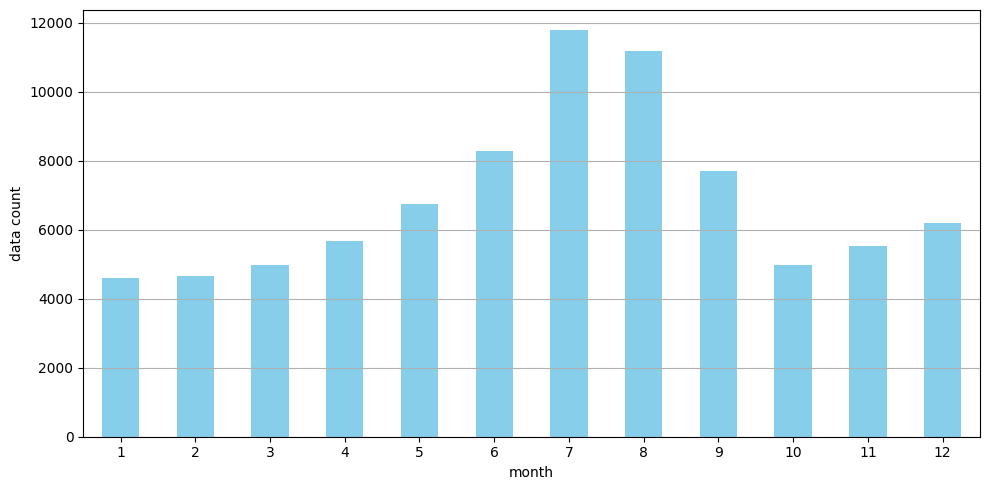

In [442]:
# snow_depth 컬럼들
snow_cols = [col for col in df.columns if 'precipitation_' in col]

# 월별로 유효한(결측이 아닌) 값 개수 합산
monthly_snow_counts = df.groupby('month')[snow_cols].apply(lambda x: x.notna().sum().sum())

# 시각화
plt.figure(figsize=(10,5))
monthly_snow_counts.plot(kind='bar', color='skyblue')
plt.xlabel("month")
plt.ylabel("data count")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [443]:
# 공통 컬럼 정의
def preprocess_precip_snow(dataframe):
    precip_cols = [f"precipitation_{i}" for i in range(24)]
    snow_cols = [f"snow_depth_{i}" for i in range(24)]

    # -9999 → NaN
    dataframe[precip_cols] = dataframe[precip_cols].replace(-9999, np.nan)
    dataframe[snow_cols] = dataframe[snow_cols].replace(-9999, np.nan)

    # NaN → 0
    dataframe[precip_cols] = dataframe[precip_cols].fillna(0)
    dataframe[snow_cols] = dataframe[snow_cols].fillna(0)

    # rainy_day_n 생성
    for i in range(24):
        dataframe[f"rainy_day_{i}"] = dataframe[f"precipitation_{i}"].where(
            dataframe[f"snow_depth_{i}"] == 0, 0
        )

    return dataframe

In [444]:
df = preprocess_precip_snow(df)
testD = preprocess_precip_snow(testD)

<ipython-input-443-068354f831ce>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[f"rainy_day_{i}"] = dataframe[f"precipitation_{i}"].where(
<ipython-input-443-068354f831ce>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[f"rainy_day_{i}"] = dataframe[f"precipitation_{i}"].where(
<ipython-input-443-068354f831ce>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-445-3fdb3c35e3eb>:13: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


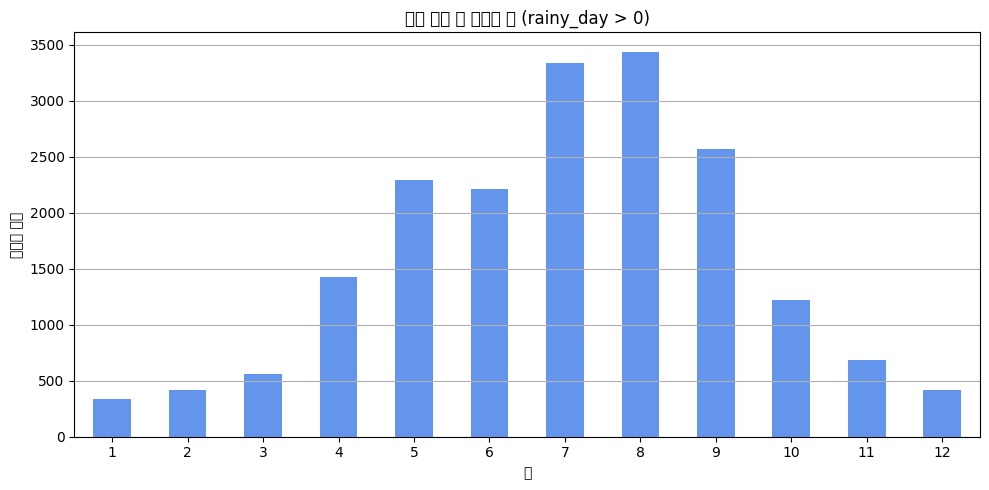

In [445]:
rainy_cols = [f"rainy_day_{i}" for i in range(24)]

# 월별로 0보다 큰 강수량의 개수 세기 (비가 온 시간의 개수)
rainy_counts = df.groupby('month')[rainy_cols].apply(lambda x: (x > 0).sum().sum())

plt.figure(figsize=(10, 5))
rainy_counts.plot(kind='bar', color='cornflowerblue')
plt.title("월별 비가 온 시간대 수 (rainy_day > 0)")
plt.xlabel("월")
plt.ylabel("데이터 개수")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [446]:
for i in range(24):
    col = f"rainy_day_{i}"
    nan_count = testD[col].isna().sum()
    neg_9999_count = (testD[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

rainy_day_0: NaN = 0, -9999 = 0
rainy_day_1: NaN = 0, -9999 = 0
rainy_day_2: NaN = 0, -9999 = 0
rainy_day_3: NaN = 0, -9999 = 0
rainy_day_4: NaN = 0, -9999 = 0
rainy_day_5: NaN = 0, -9999 = 0
rainy_day_6: NaN = 0, -9999 = 0
rainy_day_7: NaN = 0, -9999 = 0
rainy_day_8: NaN = 0, -9999 = 0
rainy_day_9: NaN = 0, -9999 = 0
rainy_day_10: NaN = 0, -9999 = 0
rainy_day_11: NaN = 0, -9999 = 0
rainy_day_12: NaN = 0, -9999 = 0
rainy_day_13: NaN = 0, -9999 = 0
rainy_day_14: NaN = 0, -9999 = 0
rainy_day_15: NaN = 0, -9999 = 0
rainy_day_16: NaN = 0, -9999 = 0
rainy_day_17: NaN = 0, -9999 = 0
rainy_day_18: NaN = 0, -9999 = 0
rainy_day_19: NaN = 0, -9999 = 0
rainy_day_20: NaN = 0, -9999 = 0
rainy_day_21: NaN = 0, -9999 = 0
rainy_day_22: NaN = 0, -9999 = 0
rainy_day_23: NaN = 0, -9999 = 0


# **상대습도**

In [447]:
for i in range(24):
    col = f"humidity_{i}"
    nan_count = testD[col].isna().sum()
    neg_9999_count = (testD[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

humidity_0: NaN = 0, -9999 = 6
humidity_1: NaN = 0, -9999 = 5
humidity_2: NaN = 0, -9999 = 3
humidity_3: NaN = 0, -9999 = 4
humidity_4: NaN = 0, -9999 = 3
humidity_5: NaN = 0, -9999 = 3
humidity_6: NaN = 0, -9999 = 4
humidity_7: NaN = 0, -9999 = 3
humidity_8: NaN = 0, -9999 = 5
humidity_9: NaN = 0, -9999 = 6
humidity_10: NaN = 0, -9999 = 5
humidity_11: NaN = 0, -9999 = 4
humidity_12: NaN = 0, -9999 = 5
humidity_13: NaN = 0, -9999 = 3
humidity_14: NaN = 0, -9999 = 1
humidity_15: NaN = 0, -9999 = 2
humidity_16: NaN = 0, -9999 = 3
humidity_17: NaN = 0, -9999 = 3
humidity_18: NaN = 0, -9999 = 3
humidity_19: NaN = 0, -9999 = 9
humidity_20: NaN = 0, -9999 = 9
humidity_21: NaN = 0, -9999 = 6
humidity_22: NaN = 0, -9999 = 5
humidity_23: NaN = 0, -9999 = 5


In [448]:
humidity_cols = [f"humidity_{i}" for i in range(24)]

# 2. 문자열로 된 -9999나 이상값을 숫자로 강제 변환
df[humidity_cols] = df[humidity_cols].apply(pd.to_numeric, errors='coerce')

# 3. -9999 값을 np.nan으로 변환
df[humidity_cols] = df[humidity_cols].replace(-9999, np.nan)

In [449]:
import numpy as np

def preprocess_humidity(dataframe):
    humidity_cols = [f"humidity_{i}" for i in range(24)]

    # 1. 문자열 포함 가능성 → 숫자형으로 강제 변환
    dataframe[humidity_cols] = dataframe[humidity_cols].apply(pd.to_numeric, errors='coerce')

    # 2. -9999 → NaN 변환
    dataframe[humidity_cols] = dataframe[humidity_cols].replace(-9999, np.nan)

    # 3. 시간축 기준 이웃 평균 보간
    for i in range(24):
        col = f"humidity_{i}"
        prev_col = f"humidity_{i-1}" if i > 0 else None
        next_col = f"humidity_{i+1}" if i < 23 else None

        if prev_col and next_col:
            fill_vals = dataframe[[prev_col, next_col]].mean(axis=1)
            dataframe.loc[dataframe[col].isna(), col] = fill_vals[dataframe[col].isna()]
        elif prev_col:
            dataframe.loc[dataframe[col].isna(), col] = dataframe.loc[dataframe[col].isna(), prev_col]
        elif next_col:
            dataframe.loc[dataframe[col].isna(), col] = dataframe.loc[dataframe[col].isna(), next_col]

    # 4. 아직 남아 있는 NaN을 month/day 기준으로 보간
    for i in range(24):
        col = f"humidity_{i}"
        for idx in dataframe[dataframe[col].isna()].index:
            m = dataframe.loc[idx, 'month']
            d = dataframe.loc[idx, 'day']
            mask = (dataframe['month'] == m) & (dataframe['day'] == d) & (~dataframe[col].isna())
            if mask.any():
                mean_val = dataframe.loc[mask, col].mean()
                dataframe.loc[idx, col] = mean_val

    return dataframe

df = preprocess_humidity(df)
testD = preprocess_humidity(testD)


In [450]:
for i in range(24):
    col = f"humidity_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

humidity_0: NaN = 0, -9999 = 0
humidity_1: NaN = 0, -9999 = 0
humidity_2: NaN = 0, -9999 = 0
humidity_3: NaN = 0, -9999 = 0
humidity_4: NaN = 0, -9999 = 0
humidity_5: NaN = 0, -9999 = 0
humidity_6: NaN = 0, -9999 = 0
humidity_7: NaN = 0, -9999 = 0
humidity_8: NaN = 0, -9999 = 0
humidity_9: NaN = 0, -9999 = 0
humidity_10: NaN = 0, -9999 = 0
humidity_11: NaN = 0, -9999 = 0
humidity_12: NaN = 0, -9999 = 0
humidity_13: NaN = 0, -9999 = 0
humidity_14: NaN = 0, -9999 = 0
humidity_15: NaN = 0, -9999 = 0
humidity_16: NaN = 0, -9999 = 0
humidity_17: NaN = 0, -9999 = 0
humidity_18: NaN = 0, -9999 = 0
humidity_19: NaN = 0, -9999 = 0
humidity_20: NaN = 0, -9999 = 0
humidity_21: NaN = 0, -9999 = 0
humidity_22: NaN = 0, -9999 = 0
humidity_23: NaN = 0, -9999 = 0


# **풍속**

In [451]:
for i in range(24):
    col = f"wind_speed_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

wind_speed_0: NaN = 11, -9999 = 2
wind_speed_1: NaN = 16, -9999 = 4
wind_speed_2: NaN = 14, -9999 = 5
wind_speed_3: NaN = 12, -9999 = 5
wind_speed_4: NaN = 16, -9999 = 2
wind_speed_5: NaN = 20, -9999 = 3
wind_speed_6: NaN = 13, -9999 = 7
wind_speed_7: NaN = 12, -9999 = 11
wind_speed_8: NaN = 7, -9999 = 15
wind_speed_9: NaN = 5, -9999 = 14
wind_speed_10: NaN = 5, -9999 = 11
wind_speed_11: NaN = 8, -9999 = 13
wind_speed_12: NaN = 5, -9999 = 15
wind_speed_13: NaN = 4, -9999 = 13
wind_speed_14: NaN = 8, -9999 = 7
wind_speed_15: NaN = 6, -9999 = 7
wind_speed_16: NaN = 6, -9999 = 9
wind_speed_17: NaN = 8, -9999 = 11
wind_speed_18: NaN = 9, -9999 = 8
wind_speed_19: NaN = 12, -9999 = 5
wind_speed_20: NaN = 10, -9999 = 5
wind_speed_21: NaN = 11, -9999 = 2
wind_speed_22: NaN = 10, -9999 = 2
wind_speed_23: NaN = 10, -9999 = 2


In [452]:
wind_speed_cols = [f"wind_speed_{i}" for i in range(24)]

# 1. -9999 → 0 처리
df[wind_speed_cols] = df[wind_speed_cols].replace(-9999, np.nan)

# 2. 선형 보간 (같은 행 기준, 시간 순서 방향으로)
df[wind_speed_cols] = df[wind_speed_cols].interpolate(axis=1, limit_direction='both')

In [453]:
def preprocess_wind_speed(df):
    wind_cols = [f"wind_speed_{i}" for i in range(24)]

    # 1. 문자열 포함 가능성 제거 및 숫자 변환
    df[wind_cols] = df[wind_cols].apply(pd.to_numeric, errors='coerce')

    # 2. -9999 → NaN
    df[wind_cols] = df[wind_cols].replace(-9999, np.nan)

    # 3. 시간 이웃 평균으로 보간
    for i in range(24):
        col = f"wind_speed_{i}"
        prev_col = f"wind_speed_{i-1}" if i > 0 else None
        next_col = f"wind_speed_{i+1}" if i < 23 else None

        if prev_col and next_col:
            avg = df[[prev_col, next_col]].mean(axis=1)
            df.loc[df[col].isna(), col] = avg[df[col].isna()]
        elif prev_col:
            df.loc[df[col].isna(), col] = df.loc[df[col].isna(), prev_col]
        elif next_col:
            df.loc[df[col].isna(), col] = df.loc[df[col].isna(), next_col]

    # 4. 여전히 NaN인 값은 month/day 기준으로 보간
    for i in range(24):
        col = f"wind_speed_{i}"
        missing_idx = df[df[col].isna()].index

        for idx in missing_idx:
            m = df.loc[idx, 'month']
            d = df.loc[idx, 'day']
            mask = (df['month'] == m) & (df['day'] == d) & (~df[col].isna())
            if mask.any():
                mean_val = df.loc[mask, col].mean()
                df.loc[idx, col] = mean_val

    return df
df = preprocess_wind_speed(df)
testD = preprocess_wind_speed(testD)

In [454]:
for i in range(24):
    col = f"wind_speed_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

wind_speed_0: NaN = 0, -9999 = 0
wind_speed_1: NaN = 0, -9999 = 0
wind_speed_2: NaN = 0, -9999 = 0
wind_speed_3: NaN = 0, -9999 = 0
wind_speed_4: NaN = 0, -9999 = 0
wind_speed_5: NaN = 0, -9999 = 0
wind_speed_6: NaN = 0, -9999 = 0
wind_speed_7: NaN = 0, -9999 = 0
wind_speed_8: NaN = 0, -9999 = 0
wind_speed_9: NaN = 0, -9999 = 0
wind_speed_10: NaN = 0, -9999 = 0
wind_speed_11: NaN = 0, -9999 = 0
wind_speed_12: NaN = 0, -9999 = 0
wind_speed_13: NaN = 0, -9999 = 0
wind_speed_14: NaN = 0, -9999 = 0
wind_speed_15: NaN = 0, -9999 = 0
wind_speed_16: NaN = 0, -9999 = 0
wind_speed_17: NaN = 0, -9999 = 0
wind_speed_18: NaN = 0, -9999 = 0
wind_speed_19: NaN = 0, -9999 = 0
wind_speed_20: NaN = 0, -9999 = 0
wind_speed_21: NaN = 0, -9999 = 0
wind_speed_22: NaN = 0, -9999 = 0
wind_speed_23: NaN = 0, -9999 = 0


# 표면 온도

학습에 쓸 예정  
시정 안 씀

In [455]:
for i in range(24):
    col = f"surface_temp_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

surface_temp_0: NaN = 0, -9999 = 12
surface_temp_1: NaN = 0, -9999 = 7
surface_temp_2: NaN = 0, -9999 = 3
surface_temp_3: NaN = 0, -9999 = 4
surface_temp_4: NaN = 0, -9999 = 4
surface_temp_5: NaN = 0, -9999 = 10
surface_temp_6: NaN = 0, -9999 = 8
surface_temp_7: NaN = 0, -9999 = 7
surface_temp_8: NaN = 0, -9999 = 7
surface_temp_9: NaN = 0, -9999 = 8
surface_temp_10: NaN = 0, -9999 = 8
surface_temp_11: NaN = 0, -9999 = 13
surface_temp_12: NaN = 0, -9999 = 11
surface_temp_13: NaN = 0, -9999 = 8
surface_temp_14: NaN = 0, -9999 = 10
surface_temp_15: NaN = 0, -9999 = 9
surface_temp_16: NaN = 0, -9999 = 10
surface_temp_17: NaN = 0, -9999 = 10
surface_temp_18: NaN = 0, -9999 = 9
surface_temp_19: NaN = 0, -9999 = 9
surface_temp_20: NaN = 0, -9999 = 4
surface_temp_21: NaN = 0, -9999 = 4
surface_temp_22: NaN = 0, -9999 = 4
surface_temp_23: NaN = 0, -9999 = 5


In [456]:
def preprocess_surface_temp(df):
    temp_cols = [f"surface_temp_{i}" for i in range(24)]

    # 1. 문자열 포함 가능성 제거 및 숫자형 변환
    df[temp_cols] = df[temp_cols].apply(pd.to_numeric, errors='coerce')

    # 2. -9999 → NaN 처리
    df[temp_cols] = df[temp_cols].replace(-9999, np.nan)

    # 3. 시간축 방향으로 선형 보간 (행 기준)
    df[temp_cols] = df[temp_cols].interpolate(axis=1, limit_direction='both')

    # 4. 남은 NaN을 month & day 기준 평균으로 보간
    for i in range(24):
        col = f"surface_temp_{i}"
        missing_idx = df[df[col].isna()].index

        for idx in missing_idx:
            m = df.loc[idx, 'month']
            d = df.loc[idx, 'day']
            mask = (df['month'] == m) & (df['day'] == d) & (~df[col].isna())
            if mask.any():
                mean_val = df.loc[mask, col].mean()
                df.loc[idx, col] = mean_val

    return df

In [457]:
df = preprocess_surface_temp(df)
testD = preprocess_surface_temp(testD)

In [458]:
for i in range(24):
    col = f"surface_temp_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

surface_temp_0: NaN = 0, -9999 = 0
surface_temp_1: NaN = 0, -9999 = 0
surface_temp_2: NaN = 0, -9999 = 0
surface_temp_3: NaN = 0, -9999 = 0
surface_temp_4: NaN = 0, -9999 = 0
surface_temp_5: NaN = 0, -9999 = 0
surface_temp_6: NaN = 0, -9999 = 0
surface_temp_7: NaN = 0, -9999 = 0
surface_temp_8: NaN = 0, -9999 = 0
surface_temp_9: NaN = 0, -9999 = 0
surface_temp_10: NaN = 0, -9999 = 0
surface_temp_11: NaN = 0, -9999 = 0
surface_temp_12: NaN = 0, -9999 = 0
surface_temp_13: NaN = 0, -9999 = 0
surface_temp_14: NaN = 0, -9999 = 0
surface_temp_15: NaN = 0, -9999 = 0
surface_temp_16: NaN = 0, -9999 = 0
surface_temp_17: NaN = 0, -9999 = 0
surface_temp_18: NaN = 0, -9999 = 0
surface_temp_19: NaN = 0, -9999 = 0
surface_temp_20: NaN = 0, -9999 = 0
surface_temp_21: NaN = 0, -9999 = 0
surface_temp_22: NaN = 0, -9999 = 0
surface_temp_23: NaN = 0, -9999 = 0


#결측값 관측 함수

In [459]:
def check_missing(df, prefix):
    result = []
    for i in range(24):
        col = f"{prefix}_{i}"
        if col in df.columns:
            nan_count = df[col].isna().sum()
            neg_9999_count = (df[col] == -9999).sum()
            result.append({
                "column": col,
                "NaN_count": nan_count,
                "-9999_count": neg_9999_count
            })
    return pd.DataFrame(result)

#이슬점 온도

In [460]:
check_missing(df,"dew_point")

,column,NaN_count,-9999_count
0,dew_point_0,6,0
1,dew_point_1,8,0
2,dew_point_2,10,0
3,dew_point_3,10,0
4,dew_point_4,9,0
5,dew_point_5,17,0
6,dew_point_6,16,0
7,dew_point_7,14,0
8,dew_point_8,15,0
9,dew_point_9,15,0


In [461]:
def process_dew_point(df):
    # 1. dew_point 컬럼 리스트
    dew_cols = [f"dew_point_{i}" for i in range(24)]

    # 2. -9999 → NaN으로 변환
    df[dew_cols] = df[dew_cols].replace(-9999, np.nan)

    # 3. 연속된 NaN 최대 개수 계산 함수
    def count_consecutive_nans(row):
        max_count = count = 0
        for val in row:
            if np.isnan(val):
                count += 1
                max_count = max(max_count, count)
            else:
                count = 0
        return max_count

    # ✅ 4. 연속된 NaN 개수 계산하되 제거는 하지 않음
    df["dew_point_max_consec_nan"] = df[dew_cols].apply(count_consecutive_nans, axis=1)

    # ✅ 5. 시간 순서 기준 보간만 수행
    df[dew_cols] = df[dew_cols].interpolate(axis=1, limit_direction='both')

    # ✅ 6. 보조 컬럼 제거
    df.drop(columns=["dew_point_max_consec_nan"], inplace=True)

    return df


In [462]:
df =  process_dew_point(df)

<ipython-input-461-4ec978dacb72>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dew_point_max_consec_nan"] = df[dew_cols].apply(count_consecutive_nans, axis=1)


In [463]:
def fill_dew_point_with_group_mean(dataframe):
    # 1. dew_point_n_*에서 0인 값을 NaN으로 변환
    dew_cols = [f"dew_point_{i}" for i in range(24)]
    dataframe[dew_cols] = dataframe[dew_cols].replace(0, np.nan)

    # 2. 같은 날(month, day 기준) 평균으로 결측값을 채움
    for col in dew_cols:
        dataframe[col] = dataframe.groupby(['month', 'day'])[col].transform(
            lambda x: x.fillna(x.mean())
        )

    return dataframe

# df와 testD에 적용
df = fill_dew_point_with_group_mean(df)
testD = fill_dew_point_with_group_mean(testD)

#수증기압력, 현지기압, 해면기압

수증기압력 - dew_point와 humidity로 회귀 보간    
현지기압 & 해면기압 - 상호 대체 + 보간

In [464]:
check_missing(df,"vapor_pressure")

,column,NaN_count,-9999_count
0,vapor_pressure_0,6,0
1,vapor_pressure_1,8,0
2,vapor_pressure_2,9,0
3,vapor_pressure_3,10,0
4,vapor_pressure_4,9,0
5,vapor_pressure_5,17,0
6,vapor_pressure_6,16,0
7,vapor_pressure_7,14,0
8,vapor_pressure_8,14,0
9,vapor_pressure_9,15,0


In [465]:
check_missing(df,"local_pressure")

,column,NaN_count,-9999_count
0,local_pressure_0,0,9
1,local_pressure_1,0,4
2,local_pressure_2,0,1
3,local_pressure_3,0,2
4,local_pressure_4,0,2
5,local_pressure_5,0,8
6,local_pressure_6,0,6
7,local_pressure_7,0,5
8,local_pressure_8,0,4
9,local_pressure_9,0,4


In [466]:
check_missing(df,"sea_level_pressure")

,column,NaN_count,-9999_count
0,sea_level_pressure_0,0,11
1,sea_level_pressure_1,0,7
2,sea_level_pressure_2,0,4
3,sea_level_pressure_3,0,5
4,sea_level_pressure_4,0,5
5,sea_level_pressure_5,0,11
6,sea_level_pressure_6,0,9
7,sea_level_pressure_7,0,8
8,sea_level_pressure_8,0,7
9,sea_level_pressure_9,0,7


In [467]:
from sklearn.linear_model import LinearRegression
import numpy as np

def process_pressure_features(df):
    # 0. -9999 → NaN 변환
    df.replace(-9999, np.nan, inplace=True)

    # 1. vapor_pressure 회귀 보간
    for i in range(24):
        vp = f"vapor_pressure_{i}"
        dp = f"dew_point_{i}"
        hum = f"humidity_{i}"

        valid = df[[vp, dp, hum]].dropna()
        if valid.shape[0] >= 5:
            model = LinearRegression()
            model.fit(valid[[dp, hum]], valid[vp])
            mask = df[vp].isna() & df[dp].notna() & df[hum].notna()
            if mask.any():
                df.loc[mask, vp] = model.predict(df.loc[mask, [dp, hum]])

    # 2. vapor_pressure 보간
    vp_cols = [f"vapor_pressure_{i}" for i in range(24)]
    df[vp_cols] = df[vp_cols].interpolate(axis=0, limit_direction='both')

    # 3. local_pressure / sea_level_pressure 상호 대체 + 보간
    lp_cols = [f"local_pressure_{i}" for i in range(24)]
    slp_cols = [f"sea_level_pressure_{i}" for i in range(24)]

    for lp, slp in zip(lp_cols, slp_cols):
        df[lp] = df[lp].fillna(df[slp])
        df[slp] = df[slp].fillna(df[lp])

    df[lp_cols] = df[lp_cols].interpolate(axis=1, limit_direction='both')
    df[slp_cols] = df[slp_cols].interpolate(axis=1, limit_direction='both')

    # ✅ 4. 행 제거 없이 flag만 생성
    df["vapor_pressure_imputed"] = df[vp_cols].isna().sum(axis=1) > 0
    df["local_pressure_imputed"] = df[lp_cols].isna().sum(axis=1) > 0
    df["sea_level_pressure_imputed"] = df[slp_cols].isna().sum(axis=1) > 0

    return df


In [468]:
df = process_pressure_features(df)
testD = process_pressure_features(testD)

<ipython-input-467-c78655888bdc>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["vapor_pressure_imputed"] = df[vp_cols].isna().sum(axis=1) > 0
<ipython-input-467-c78655888bdc>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["local_pressure_imputed"] = df[lp_cols].isna().sum(axis=1) > 0
<ipython-input-467-c78655888bdc>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [469]:
testD =  process_dew_point(testD)

<ipython-input-461-4ec978dacb72>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dew_point_max_consec_nan"] = df[dew_cols].apply(count_consecutive_nans, axis=1)


In [470]:
testD = process_pressure_features(testD)

#모델학습

In [471]:
print(df.columns.tolist())

['climatology_temp', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'dew_point_0', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'humidity_0', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5', 'humidity_6', 'humidity_7', 'humidity_8', 'humidity_9', 'humidity_10', 'humidity_11', 'humidity_12'

In [472]:
print(testD.columns.tolist())

['climatology_temp', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'dew_point_0', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'humidity_0', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5', 'humidity_6', 'humidity_7', 'humidity_8', 'humidity_9', 'humidity_10', 'humidity_11', 'humidity_12'

In [473]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [474]:
# 학습 데이터의 모든 feature 출력
print("Train Features:")
print(df.columns.tolist())

Train Features:
['climatology_temp', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'dew_point_0', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'humidity_0', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5', 'humidity_6', 'humidity_7', 'humidity_8', 'humidity_9', 'humidity_10', 'humidity_11

In [475]:
pd.set_option('display.max_rows', None)

# 결측값 계산 및 출력
missing_counts = df.isna().sum()
missing_cols = missing_counts[missing_counts > 0]

print(f"총 결측값이 존재하는 컬럼 수: {len(missing_cols)}")
print(missing_cols)

총 결측값이 존재하는 컬럼 수: 120
visibility_0             18
visibility_1             21
visibility_2             23
visibility_3             21
visibility_4             22
visibility_5             23
visibility_6             25
visibility_7             24
visibility_8             26
visibility_9             30
visibility_10            37
visibility_11            35
visibility_12            25
visibility_13            19
visibility_14            27
visibility_15            20
visibility_16            33
visibility_17            28
visibility_18            26
visibility_19            26
visibility_20            25
visibility_21            24
visibility_22            25
visibility_23            22
wind_direction_0         17
wind_direction_1         24
wind_direction_2         24
wind_direction_3         22
wind_direction_4         25
wind_direction_5         31
wind_direction_6         27
wind_direction_7         29
wind_direction_8         31
wind_direction_9         28
wind_direction_10        2

In [476]:
# 테스트 데이터의 모든 feature 출력
print("\nTest Features:")
print(testD.columns.tolist())


Test Features:
['climatology_temp', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'dew_point_0', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'humidity_0', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5', 'humidity_6', 'humidity_7', 'humidity_8', 'humidity_9', 'humidity_10', 'humidity_11

In [477]:
exclude_features = [
    'id', 'station_name', 'target', 'month', 'day',
    'vapor_pressure_imputed', 'local_pressure_imputed', 'sea_level_pressure_imputed'
]

# cloud_cover lag/roll
for i in range(24):
    exclude_features.append(f'cloud_cover_{i}_lag1')
    exclude_features.append(f'cloud_cover_{i}_lag2')
    exclude_features.append(f'cloud_cover_{i}_roll3')

# visibility
for i in range(24):
    exclude_features.append(f'visibility_{i}')
    exclude_features.append(f'wind_direction_{i}')

X_train = df.drop(columns=exclude_features, errors='ignore')
y_train = df['target'].copy()
X_test = testD.drop(columns=exclude_features, errors='ignore')


In [478]:
print("\nTest Features:")
print(X_train.columns.tolist())


Test Features:
['climatology_temp', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'dew_point_0', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'humidity_0', 'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5', 'humidity_6', 'humidity_7', 'humidity_8', 'humidity_9', 'humidity_10', 'humidity_11

In [479]:
print(np.isnan(X_test).sum())

climatology_temp         0
cloud_cover_0            0
cloud_cover_1            0
cloud_cover_2            0
cloud_cover_3            0
cloud_cover_4            0
cloud_cover_5            0
cloud_cover_6            0
cloud_cover_7            0
cloud_cover_8            0
cloud_cover_9            0
cloud_cover_10           0
cloud_cover_11           0
cloud_cover_12           0
cloud_cover_13           0
cloud_cover_14           0
cloud_cover_15           0
cloud_cover_16           0
cloud_cover_17           0
cloud_cover_18           0
cloud_cover_19           0
cloud_cover_20           0
cloud_cover_21           0
cloud_cover_22           0
cloud_cover_23           0
dew_point_0              0
dew_point_1              0
dew_point_2              0
dew_point_3              0
dew_point_4              0
dew_point_5              0
dew_point_6              0
dew_point_7              0
dew_point_8              0
dew_point_9              0
dew_point_10             0
dew_point_11             0
d

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 1. 사용하지 않을 피처 제거


# 2. base 모델 정의
base_models = [
    ('xgb', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs =-1
    )),
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        n_jobs =-1
    )),
    ('ridge', Ridge(alpha=1.0))
]

# 3. meta 모델 (최종 예측자)
meta_model = Ridge(alpha=1.0)

# 4. 스태킹 모델 정의
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,  # base 모델의 input도 meta에 함께 전달
    cv=5,
    n_jobs=-1
)

# 5. 학습
stacking_model.fit(X_train, y_train)

# 6. 예측
y_pred = stacking_model.predict(X_test)

# 7. 결과 저장
submission = testD.copy().reset_index(drop=True)
submission['prediction'] = y_pred
submission[['id', 'prediction']].to_csv("submission_stacking.csv", index=False)

In [ ]:
from google.colab import files
files.download("submission_stacking.csv")